In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving train_s3TEQDk.csv to train_s3TEQDk.csv
Saving test_mSzZ8RL.csv to test_mSzZ8RL.csv


In [238]:
train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')

# Data Preprocessing 

In [40]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [239]:
train.Credit_Product.fillna('Blank',inplace=True)
test.Credit_Product.fillna('Blank',inplace=True)

In [93]:
train.Region_Code = train.Region_Code.apply(lambda x: x[:-1])
test.Region_Code = test.Region_Code.apply(lambda x: x[:-1])

In [240]:
train.Avg_Account_Balance = train.Avg_Account_Balance.apply(lambda x: np.log(x))
test.Avg_Account_Balance = test.Avg_Account_Balance.apply(lambda x: np.log(x))

In [241]:
train.Age = train.Age.apply(lambda x: np.log(x))
test.Age = test.Age.apply(lambda x: np.log(x))

In [242]:
train.Vintage = train.Vintage.apply(lambda x: np.log(x))
test.Vintage = test.Vintage.apply(lambda x: np.log(x))

In [208]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,4.290459,RG268,Other,X3,3.761200,No,13.860193,No,0
1,IDD62UNG,Female,3.401197,RG277,Salaried,X1,3.465736,No,13.274205,No,0
2,HD3DSEMC,Female,4.025352,RG268,Self_Employed,X3,3.258097,No,14.210464,Yes,0
3,BF3NC7KV,Male,3.526361,RG270,Salaried,X1,2.944439,No,13.061453,No,0
4,TEASRWXV,Female,3.401197,RG282,Salaried,X1,3.496508,No,13.695360,No,0


In [243]:

onehotencoder = pd.get_dummies(test[['Region_Code','Gender','Occupation','Channel_Code','Credit_Product','Is_Active']], drop_first=True)
# Drop column non_numeric_col as it is now encoded
test = test.drop(['Region_Code','Gender','Occupation','Channel_Code','Credit_Product','Is_Active'],axis = 1)
# Join the encoded dataframe to X
test = test.join(onehotencoder)

In [244]:

onehotencoder = pd.get_dummies(train[['Region_Code','Gender','Occupation','Channel_Code','Credit_Product','Is_Active']], drop_first=True)
# Drop column non_numeric_col as it is now encoded
train = train.drop(['Region_Code','Gender','Occupation','Channel_Code','Credit_Product','Is_Active'],axis = 1)
# Join the encoded dataframe to X
train = train.join(onehotencoder)

In [252]:
train=train.drop(['ID'],axis=1)

In [253]:
test=test.drop(['ID'],axis=1)
test.head()

,Age,Vintage,Avg_Account_Balance,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,Region_Code_RG254,Region_Code_RG255,Region_Code_RG256,Region_Code_RG257,Region_Code_RG258,Region_Code_RG259,Region_Code_RG260,Region_Code_RG261,Region_Code_RG262,Region_Code_RG263,Region_Code_RG264,Region_Code_RG265,Region_Code_RG266,Region_Code_RG267,Region_Code_RG268,Region_Code_RG269,Region_Code_RG270,Region_Code_RG271,Region_Code_RG272,Region_Code_RG273,Region_Code_RG274,Region_Code_RG275,Region_Code_RG276,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Gender_Male,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes,Is_Active_Yes
0,3.367296,3.218876,13.517598,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
1,3.761200,3.891820,13.738129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
2,3.433987,2.639057,12.282798,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
3,3.367296,3.496508,13.674028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
4,3.367296,2.944439,13.395572,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


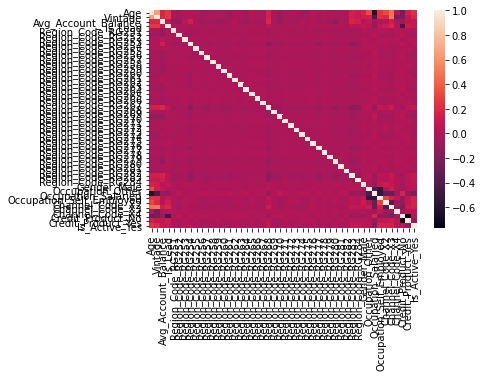

In [254]:
import seaborn as sns
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [255]:
X=train.drop('Is_Lead', axis=1)
y=train['Is_Lead']

In [256]:
X_train, X_test, y_train_full, y_test_full = train_test_split(X, y, test_size=0.001, random_state=44)

SMOTE used for balancing the dataset

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train_full)
X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
y_train_full=y_train_oversampled

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [257]:
pd.Series(y_train_full).value_counts().sort_index()

0    187253
1     58226
Name: Is_Lead, dtype: int64

# Model Implementation

In [267]:
from sklearn.preprocessing import MinMaxScaler


In [258]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [268]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X)


In [259]:
Test_data = sc.transform(test)

Logistic Regression


In [168]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(random_state = 0)
lr_clf.fit(X_train, y_train_full)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
print('Accuracy on training set:',lr_clf.score(X_train,y_train_full))
print('Accuracy on test set:',lr_clf.score(X_test,y_test_full))

Accuracy on training set: 0.8538848464130487
Accuracy on test set: 0.8552220341190259


In [60]:
from sklearn.naive_bayes import GaussianNB
nb_clf= GaussianNB()
nb_clf.fit(X_train, y_train_full)

GaussianNB(priors=None, var_smoothing=1e-09)

In [61]:
print('Accuracy on training set:',nb_clf.score(X_train,y_train_full))
print('Accuracy on test set:',nb_clf.score(X_test,y_test_full))

Accuracy on training set: 0.7791585023418354
Accuracy on test set: 0.7779005894962486


Random Forest

In [170]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 50, random_state = 0,max_depth=9,max_features=5)
rf_clf.fit(X_train, y_train_full)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [171]:
print('Accuracy on training set:',rf_clf.score(X_train,y_train_full))
print('Accuracy on test set:',rf_clf.score(X_test,y_test_full))

Accuracy on training set: 0.8526151291693119
Accuracy on test set: 0.851478057038677


In [172]:
for i in range(1,8):
  rf_clf = RandomForestClassifier(n_estimators = 50, random_state = 0,max_depth=i*3,max_features=5)
  rf_clf.fit(X_train, y_train_full)
  print(i)
  print('Accuracy on training set:',rf_clf.score(X_train,y_train_full))
  print('Accuracy on test set:',rf_clf.score(X_test,y_test_full))
  pred =  rf_clf.predict_proba(X_test)[:, 1] 
  print(roc_auc_score(y_test_full, pred))

1
Accuracy on training set: 0.7653736170120407
Accuracy on test set: 0.7681013152754265
0.8317937041740948
2
Accuracy on training set: 0.8142631570379776
Accuracy on test set: 0.8151777575205105
0.8595428045743887
3
Accuracy on training set: 0.8526151291693119
Accuracy on test set: 0.851478057038677
0.8712228964561035
4
Accuracy on training set: 0.8653557107432187
Accuracy on test set: 0.8572405261101705
0.8731604762144036
5
Accuracy on training set: 0.8777110362303506
Accuracy on test set: 0.8602845422581066
0.8744670357890768
6
Accuracy on training set: 0.8915856814963129
Accuracy on test set: 0.8602194296132308
0.872957593963395
7
Accuracy on training set: 0.9058564351331847
Accuracy on test set: 0.8599264227112905
0.8719006166082994


In [271]:
test['Is_Lead'] = list(res)

In [272]:
test.to_csv('Submission2.csv')

In [273]:
from google.colab import files
files.download("Submission2.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

XGBoost (used for final submission)

In [35]:
from xgboost import XGBClassifier

In [269]:
xgb_clf= XGBClassifier(max_depth=6)
xgb_clf.fit(X_train, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [261]:
from sklearn.metrics import accuracy_score
print('Accuracy score on train_data: ', accuracy_score(y_true = y_train_full, y_pred = xgb_clf.predict(X_train).round()))
print('Accuracy score on test_data: ', accuracy_score(y_true = y_test_full, y_pred = xgb_clf.predict(X_test).round()))

Accuracy score on train_data:  0.8630229062363787
Accuracy score on test_data:  0.8333333333333334


In [262]:
pred =  xgb_clf.predict_proba(X_test)[:, 1] 
print(roc_auc_score(y_test_full, pred))

0.8459852734922861


In [270]:
res = xgb_clf.predict_proba(Test_data)

In [ ]:
voting_clf2 = VotingClassifier(
 estimators=[('lr', lr_clf),('decision', dec_clf)],
 voting='soft')
voting_clf2.fit(X_train, y_train_full)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=0, solver='lbfgs',
                                                 tol=0.0001, verbose=0,
                                                 warm_start=False)),
                             ('decision',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                        

In [ ]:
print(voting_clf2.score(X_test, y_test_full))
print(voting_clf2.score(X_train, y_train_full))

0.8515820531081494
0.8749058907315088


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 8, metric = 'minkowski', p = 2)  
#You can change these hyperparameters like metric etc.
knn_clf.fit(X_train, y_train_full)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [ ]:
print('Accuracy on training set:',knn_clf.score(X_train,y_train_full))
print('Accuracy on test set:',knn_clf.score(X_test,y_test_full))

Accuracy on training set: 0.8704617104285024
Accuracy on test set: 0.8529593697095976


In [ ]:
model= XGBClassifier()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:


# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_train, y_train_full, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC:',mean(scores))

In [ ]:
print('Mean ROC AUC:',np.mean(scores))

Mean ROC AUC: 0.781322117997801


In [ ]:
res = voting_clf2.predict_proba(Test_data)

In [ ]:
res

array([[0.96186996, 0.03813006],
       [0.0946129 , 0.9053871 ],
       [0.9475956 , 0.05240437],
       ...,
       [0.9381342 , 0.06186578],
       [0.8128699 , 0.18713011],
       [0.96044195, 0.03955803]], dtype=float32)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [ ]:
y_train = y_train_full.values

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)

In [ ]:
feat_selector.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
feat_selector.ranking_

array([1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
X_filtered = feat_selector.transform(X_train)

In [ ]:
X_filtered

array([[-0.26118535, -1.01821529, -0.03045029, ..., -1.19298702,
         1.55180536, -0.79836621],
       [ 0.34517069, -0.83259519,  0.87999687, ..., -1.19298702,
        -0.64441072, -0.79836621],
       [-0.7327956 , -0.86353187, -0.15217037, ..., -1.19298702,
         1.55180536, -0.79836621],
       ...,
       [-0.19381245,  0.28112542, -0.57117603, ...,  0.83823209,
        -0.64441072,  1.25255802],
       [ 0.68203516,  2.16826312,  0.64091624, ..., -1.19298702,
        -0.64441072,  1.25255802],
       [ 0.34517069,  0.06456864, -0.83443868, ...,  0.83823209,
        -0.64441072, -0.79836621]])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(16,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train_full,epochs=2,batch_size=1, verbose=1,validation_split=0.25)

Epoch 1/2
138219/138219 [==============================] - 184s 1ms/step - loss: 0.3736 - accuracy: 0.8474 - val_loss: 0.3569 - val_accuracy: 0.8571
Epoch 2/2
138219/138219 [==============================] - 183s 1ms/step - loss: 0.3572 - accuracy: 0.8584 - val_loss: 0.3612 - val_accuracy: 0.8570


In [ ]:
score = model.evaluate(X_test, y_test_full,verbose=1)

1920/1920 [==============================] - 3s 1ms/step - loss: 0.3573 - accuracy: 0.8591


In [ ]:
score

[0.35727736353874207, 0.8590962290763855]

In [ ]:
res = model.predict_proba(Test_data)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
